<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/notebooks/2.0-la-tj-ak-ensemble_baseline_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Video Sentiment Analysis in the Wild
### Ensembling Notebook | FC | CS231n

This notebook runs a basic FC classifier on the predicted outputs of each individual modality. Assumes the preprocessing has already been completed.

Contains:
- Frame
- Audio
- Pose


### Are we working with the tiny dataset or the final dataset?

In [0]:
IS_TINY = False

### Copy Pre-Processed Files

In [2]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')
FULL_PATH = 'My Drive/cs231n-project/datasets/emotiw'
if IS_TINY:
    print("Using tiny dataset...")
    !cp /content/drive/'$FULL_PATH'/train-tiny-frames* .
    !cp /content/drive/'$FULL_PATH'/val-tiny-frames* .
    !cp /content/drive/'$FULL_PATH'/train-tiny-pose* .
    !cp /content/drive/'$FULL_PATH'/val-tiny-pose* .
else:
    print("Using final dataset...")
    !cp /content/drive/'$FULL_PATH'/train-final-frames* .
    !cp /content/drive/'$FULL_PATH'/val-final-frames* .
    !cp /content/drive/'$FULL_PATH'/train-final-pose* .
    !cp /content/drive/'$FULL_PATH'/val-final-pose* .

!wget https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt
!wget https://storage.googleapis.com/cs231n-emotiw/data/Val_labels.txt


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Using final dataset...
--2020-06-07 16:25:55--  https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21653 (21K) [text/plain]
Saving to: ‘Train_labels.txt’

Train_labels.txt    100%[===================

In [4]:
!ls

drive	     train-final-frames.zip  Train_labels.txt	   val-final-pose.zip
sample_data  train-final-pose.zip    val-final-frames.zip  Val_labels.txt


In [4]:
# RUN THIS FOR TINY FILES (zip does not include root folder)

if IS_TINY:
    !unzip -d train-tiny-frames train-tiny-pose.zip
    !unzip -d train-tiny-frames train-tiny-frames.zip

    !unzip -d val-tiny-frames val-tiny-pose.zip
    !unzip -d val-tiny-frames val-tiny-frames.zip


# RUN THIS FOR FINAL FILES (zip includes root folder)

if not IS_TINY:
    !unzip train-final-pose.zip
    !unzip train-final-frames.zip

    !unzip val-final-pose.zip
    !unzip val-final-frames.zip



Streaming output truncated to the last 5000 lines.
  inflating: val-final-frames/1/frame_45_1.mp4_7.jpg  
  inflating: val-final-frames/1/frame_294_36.mp4_10.jpg  
  inflating: val-final-frames/1/frame_289_34.mp4_7.jpg  
  inflating: val-final-frames/1/frame_212_2.mp4_1.jpg  
  inflating: val-final-frames/1/frame_53_11.mp4_8.jpg  
  inflating: val-final-frames/1/frame_44_25.mp4_3.jpg  
  inflating: val-final-frames/1/frame_5_19.mp4_3.jpg  
  inflating: val-final-frames/1/frame_298_12.mp4_6.jpg  
  inflating: val-final-frames/1/frame_179_1.mp4_8.jpg  
  inflating: val-final-frames/1/frame_53_49.mp4_4.jpg  
  inflating: val-final-frames/1/frame_31_5.mp4_1.jpg  
  inflating: val-final-frames/1/frame_11_16.mp4_4.jpg  
  inflating: val-final-frames/1/frame_44_16.mp4_6.jpg  
  inflating: val-final-frames/1/frame_294_1.mp4_0.jpg  
  inflating: val-final-frames/1/frame_284_6.mp4_5.jpg  
  inflating: val-final-frames/1/frame_289_51.mp4_3.jpg  
  inflating: val-final-frames/1/frame_70_12.mp4_0.j

In [6]:
!ls

drive			train-final-pose      val-final-frames.zip
sample_data		train-final-pose.zip  val-final-pose
train-final-frames	Train_labels.txt      val-final-pose.zip
train-final-frames.zip	val-final-frames      Val_labels.txt


### Run Classifiers

In [0]:
%tensorflow_version 2.x

In [6]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [7]:
!pwd

/content


In [8]:
!git clone 'https://github.com/kevincong95/cs231n-emotiw.git'

Cloning into 'cs231n-emotiw'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 922 (delta 140), reused 121 (delta 51), pack-reused 683
Receiving objects: 100% (922/922), 189.65 MiB | 33.48 MiB/s, done.
Resolving deltas: 100% (548/548), done.


In [0]:
!mv train-* cs231n-emotiw
!mv val-* cs231n-emotiw

In [0]:
!mv Train* cs231n-emotiw
!mv Val* cs231n-emotiw

In [11]:
!ls

cs231n-emotiw  drive  sample_data


In [12]:
import os
os.chdir('/content/cs231n-emotiw')
!pwd

/content/cs231n-emotiw


In [0]:
# Create the concatenated input layer to feed into FC

from src.classifiers.audio_classifier import AudioClassifier
from src.classifiers.frames_classifier import FramesClassifier
from src.classifiers.pose_classifier import PoseClassifier
from src.classifiers.face_classifier import FaceClassifier
from src.classifiers.utils import get_num_samples
import numpy as np

def run_classifier(layers_to_extract, audio_folder='train-final-audio', frames_folder='train-final-frames', pose_folder='train-final-pose', face_folder='train-final-fer' , labels_file="Train_labels.txt"):
    pose_classifier = PoseClassifier(pose_folder, model_location='https://storage.googleapis.com/cs231n-emotiw/models/pose-classifier-64lstm-0.01reg.h5', is_test=False)
    classifiers = [pose_classifier]

    sample_to_true_label = {}
    with open(labels_file) as f:
        l = 0
        for line in f:
            if l == 0:
                # Skip headers
                l += 1
                continue
            line_arr = line.split(" ")
            sample_to_true_label[line_arr[0].strip()] = int(line_arr[1].strip()) # subtract one to make labels from 0 to 2
            l += 1

    classifier_outputs = []
    classifier_samples = []
    classifier_dim_sizes = []
    output_dim_size = 0
    num_samples = 0
    sample_to_row = {}

    y_valid = []

    for i, classifier in enumerate(classifiers):
        output, samples = classifier.predict()
        # output, samples = classifier.predict(layers_to_extract[i])
        output_dim_size += output.shape[1]
        classifier_dim_sizes.append(output.shape[1])
        num_samples = len(samples)
        classifier_outputs.append(output)
        classifier_samples.append(samples)

    for sample in classifier_samples[0]:
        y_valid.append(sample_to_true_label[sample])

    return np.argmax(classifier_outputs[0], axis=1) + 1, y_valid, classifier_samples[0]





In [99]:
import tensorflow as tf

prefix = "final"
if IS_TINY:
    prefix = "tiny"

y_pred, y_valid, samples_run = run_classifier([], audio_folder=f"val-{prefix}-audio", frames_folder=f"val-{prefix}-frames", pose_folder=f"val-{prefix}-pose", face_folder=f"val-{prefix}-fer" , labels_file="Val_labels.txt")



PoseClassifier created with pose_folder = val-final-pose , is_test = False , model_location = https://storage.googleapis.com/cs231n-emotiw/models/pose-classifier-64lstm-0.01reg.h5
Skipping unzipping files as input is a folder
['3', '2', '1']
Found 766 frames belonging to 766 videos belonging to 3 classes.
Min frames determined to be 7


/content/cs231n-emotiw/src/generators/pose_generator.py:135: RuntimeWarning: invalid value encountered in double_scalars
  x_new.append((lx[i] - origin_x) / len_x)
/content/cs231n-emotiw/src/generators/pose_generator.py:136: RuntimeWarning: invalid value encountered in double_scalars
  x_new.append((ly[i] - origin_y) / len_y)


In [18]:
!ls val-final-pose/1/ | head

frame_11_10.mp4_0_keypoints.json
frame_11_10.mp4_10_keypoints.json
frame_11_10.mp4_11_keypoints.json
frame_11_10.mp4_12_keypoints.json
frame_11_10.mp4_13_keypoints.json
frame_11_10.mp4_14_keypoints.json
frame_11_10.mp4_1_keypoints.json
frame_11_10.mp4_2_keypoints.json
frame_11_10.mp4_3_keypoints.json
frame_11_10.mp4_4_keypoints.json


In [0]:
import numpy as np
import random
import cv2
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import tensorflow as tf


class DataGenerator(tf.keras.utils.Sequence):
    """
    Generates keypoint data across each frame
    """
    def __init__(self, keyframe_dir, file_name, batch_size=32, frames_to_use=-1, shuffle=False):
        self.frames_to_use = frames_to_use
        self.batch_size = batch_size
        self.keyframe_dir = keyframe_dir
        self.file_name = file_name
        self.shuffle = shuffle
        self.classes = self.find_classes()
        self.video_names, self.video_map, self.video_to_class, self.num_samples, self.min_frames = self.find_samples()
        self.on_epoch_end()
        print(f"Found {self.num_samples} frames belonging to {len(self.video_names)} videos belonging to {len(self.classes)} classes.")
        print(f"Min frames determined to be {self.min_frames}")

    def find_classes(self):
        category_folders = [f for f in listdir(self.keyframe_dir) if not isfile(join(self.keyframe_dir, f))]
        return sorted(list(set(category_folders)))

    def find_samples(self):
        """
        Returns the following video frame structure:
        """
        num_samples = 0
        min_frames = -1
        video_map = {}
        vid_to_cat = {}
        category_folders = [f for f in listdir(self.keyframe_dir) if not isfile(join(self.keyframe_dir, f))]
        print(category_folders)
        for category_folder in category_folders:
            cat_path = join(self.keyframe_dir, category_folder)
            frames = [f for f in listdir(cat_path) if isfile(join(cat_path, f))]
            for frame in frames:
                if self.file_name not in frame:
                    continue
                frame_arr = frame.split(".mp4_")
                vid_name = frame_arr[0]
                if vid_name not in video_map:
                    video_map[vid_name] = []
                    vid_to_cat[vid_name] = category_folder
                video_map[vid_name].append(frame)
            
            i = 0
            for k in video_map.keys():
                # make sure the frames for each video are in sorted order
                video_map[k] = sorted(video_map[k], key=lambda x: x.split(".mp4_")[0] + x.split(".mp4_")[1].split("_keypoints")[0].zfill(3))
                if min_frames == -1 or len(video_map[k]) < min_frames:
                    min_frames = len(video_map[k])

        return list(video_map.keys()), video_map, vid_to_cat, len(vid_to_cat), min_frames

    def get_body_joints(self, x):
        body_parts = [
            1, # neck       --
            2, # r shoulder
            3, # r elbow
            4, # r wrist
            5, # l shoulder
            6, # l elbow
            7, # l wrist
            9, # r hip
            10, # r knee
            11, # r ankle
            12, # l hip
            13, # l knee
            14, # l ankle   -- 
        ]
        body_parts_xy = []
        for b in body_parts:
            body_parts_xy.append(b * 3)
            body_parts_xy.append(b * 3 + 1)
        return x[body_parts_xy]

    def normalize(self, x_input):
        # Separate original data into x_list and y_list
        lx = []
        ly = []
        N = len(x_input)
        i = 0
        while i<N:
            lx.append(x_input[i])
            ly.append(x_input[i+1])
            i+=2
        lx = np.array(lx)
        ly = np.array(ly)

        # Get rid of undetected data (=0)
        non_zero_x = []
        non_zero_y = []
        for i in range(int(N/2)):
            if lx[i] != 0:
                non_zero_x.append(lx[i])
            if ly[i] != 0:
                non_zero_y.append(ly[i])
        if len(non_zero_x) == 0 or len(non_zero_y) == 0:
            return np.array([0] * N)

        # Normalization x/y data according to the bounding box
        origin_x = np.min(non_zero_x)
        origin_y = np.min(non_zero_y)
        len_x = np.max(non_zero_x) - np.min(non_zero_x)
        len_y = np.max(non_zero_y) - np.min(non_zero_y)
        x_new = []
        for i in range(int(N/2)):
            if (lx[i] + ly[i]) == 0:
                x_new.append(-1)
                x_new.append(-1)
            else:
                x_new.append((lx[i] - origin_x) / len_x)
                x_new.append((ly[i] - origin_y) / len_y)
        return x_new

    def __len__(self):
        """
        Denotes the number of batches per epoch
        """
        return int(np.floor(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        """
        Generate one batch of data
        """
        video_names = self.video_names[index*self.batch_size:(index+1)*self.batch_size]
        num_frames = self.min_frames if self.frames_to_use == -1 else self.frames_to_use
        X = np.zeros((len(video_names), num_frames, 13 * 2 + 1), dtype=np.float64)
        y = []
        i = 0
        for vid in video_names:
            j = 0
            for frame in self.video_map[vid]:
                keypoint_file = join(join(self.keyframe_dir, self.video_to_class[vid]), frame)
                with open(keypoint_file) as json_file:
                    keypoint_data = json.load(json_file)
                    print(keypoint_file)

                    # Extract some features from the keypoint data like averaging
                    arrs = []

                    for person in keypoint_data["people"]:
                        # Each person is assigned the label of the video
                        kp = np.array(person["pose_keypoints_2d"])
                        kp = self.get_body_joints(kp)
                        kp = self.normalize(kp)
                        arrs.append(kp)
                        # if i == 0 and j == 0:
                        #     print(kp)
                    
                    if len(arrs) > 0:
                        arrs = np.array(arrs)
                        features = []
                        features.extend(np.average(arrs, axis=0).tolist())
                        features.append(len(keypoint_data["people"]))
                        features = np.array(features)
                        features[np.isnan(features)] = -1
                        X[i, j, :] = np.array(features)
                    
                j += 1
                if j >= num_frames:
                    break

            y.append(int(self.video_to_class[vid]) - 1)
            i += 1
        y = np.array(y)
        return X, tf.keras.utils.to_categorical(y, num_classes=len(self.classes))

    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.video_names)


import numpy as np
import random
import cv2
from os import listdir
from os.path import isfile, join

class DataPreviewGenerator(tf.keras.utils.Sequence):
    """
    Generates data based on a directory of frames. Keypoints are added directly onto the images
    Used primarily for visualization purposes.
    """
    def __init__(self, dir, keyframe_dir, file_name, batch_size=32, frames_to_use=-1, backprop=[], shuffle=False):
        self.frames_to_use = frames_to_use
        self.batch_size = batch_size
        self.backprop = backprop
        self.file_name = file_name
        self.dir = dir
        self.keyframe_dir = keyframe_dir
        self.shuffle = shuffle
        self.classes = self.find_classes()
        self.video_names, self.video_map, self.video_to_class, self.num_samples, self.min_frames = self.find_samples()
        self.on_epoch_end()
        print(f"Found {self.num_samples} frames belonging to {len(self.video_names)} videos belonging to {len(self.classes)} classes.")
        print(f"Min frames determined to be {self.min_frames}")

    def find_classes(self):
        category_folders = [f for f in listdir(self.dir) if not isfile(join(self.dir, f))]
        return sorted(list(set(category_folders)))


    def normalize(self, x_input):
        # Separate original data into x_list and y_list
        lx = []
        ly = []
        N = len(x_input)
        i = 0
        while i<N:
            lx.append(x_input[i])
            ly.append(x_input[i+1])
            i+=2
        lx = np.array(lx)
        ly = np.array(ly)

        # Get rid of undetected data (=0)
        non_zero_x = []
        non_zero_y = []
        for i in range(int(N/2)):
            if lx[i] != 0:
                non_zero_x.append(lx[i])
            if ly[i] != 0:
                non_zero_y.append(ly[i])
        if len(non_zero_x) == 0 or len(non_zero_y) == 0:
            return np.array([0] * N)

        # Normalization x/y data according to the bounding box
        origin_x = np.min(non_zero_x)
        origin_y = np.min(non_zero_y)
        len_x = np.max(non_zero_x) - np.min(non_zero_x)
        len_y = np.max(non_zero_y) - np.min(non_zero_y)
        x_new = []
        for i in range(int(N/2)):
            if (lx[i] + ly[i]) == 0:
                x_new.append(-1)
                x_new.append(-1)
            else:
                x_new.append((lx[i] - origin_x) / len_x)
                x_new.append((ly[i] - origin_y) / len_y)
        return x_new

    def get_body_joints(self, x):
        body_parts = [
            1, # neck       --
            2, # r shoulder
            3, # r elbow
            4, # r wrist
            5, # l shoulder
            6, # l elbow
            7, # l wrist
            9, # r hip
            10, # r knee
            11, # r ankle
            12, # l hip
            13, # l knee
            14, # l ankle   -- 
        ]
        body_parts_xy = []
        for b in body_parts:
            body_parts_xy.append(b * 3)
            body_parts_xy.append(b * 3 + 1)
        return x[body_parts_xy]

    def find_samples(self):
        """
        Returns the following video frame structure:

        {
            "vid1": [
                "frame1.jpg",
                "frame2.jpg",
                ...
            ]
        }

        """
        num_samples = 0
        min_frames = -1
        video_map = {}
        vid_to_cat = {}
        category_folders = [f for f in listdir(self.dir) if not isfile(join(self.dir, f))]
        for category_folder in category_folders:
            cat_path = join(self.dir, category_folder)
            frames = [f for f in listdir(cat_path) if isfile(join(cat_path, f))]
            for frame in frames:
                # frame = frame_101_7.mp4_8.jpg
                if self.file_name not in frame:
                    continue

                frame_arr = frame.split(".mp4_")
                vid_name = frame_arr[0]
                if vid_name not in video_map:
                    video_map[vid_name] = []
                    vid_to_cat[vid_name] = category_folder
                video_map[vid_name].append(frame)
            
            for k in video_map.keys():
                # make sure the frames for each video are in sorted order
                video_map[k] = sorted(video_map[k], key=lambda x: x.split(".mp4_")[0] + x.split(".mp4_")[1].split("_keypoints")[0].zfill(3))
                if min_frames == -1 or len(video_map[k]) < min_frames:
                    min_frames = len(video_map[k])

        return list(video_map.keys()), video_map, vid_to_cat, len(vid_to_cat), min_frames

    def __len__(self):
        """
        Denotes the number of batches per epoch
        """
        return int(np.floor(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        """
        Generate one batch of data
        """
        video_names = self.video_names[index*self.batch_size:(index+1)*self.batch_size]

        print(f"Working on batch {index} with {len(video_names)} videos")

        num_frames = self.min_frames if self.frames_to_use == -1 else self.frames_to_use
        X = np.zeros((len(video_names), num_frames, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
        y = []
        i = 0
        for vid in video_names:
            print(vid)
            j = 0
            for frame in self.video_map[vid]:
                # print("   " + frame)
                keypoint_file = frame.replace(".jpg", "_keypoints.json")
                keypoint_file = join(join(self.keyframe_dir, self.video_to_class[vid]), keypoint_file)

                frame_path = join(join(self.dir, self.video_to_class[vid]), frame)
                img = cv2.imread(frame_path)

                actions = []
                with open(keypoint_file) as json_file:
                    keypoint_data = json.load(json_file)
                    for person in keypoint_data["people"]:
                        # Each person is assigned the label of the video
                        kp = np.array(person["pose_keypoints_2d"])
                        try:
                            # Filter for body joints
                            kp2 = self.get_body_joints(kp)
                            if np.count_nonzero(kp2==0) < 2:
                                kp2 = self.normalize(kp2)
                                # print(kp2)
                                output = model.predict([kp2])
                                out = np.argmax(output)
                                cats = ["kick", "punch", "squat", "stand", "wave"]
                                actions.append(cats[out])
                        except:
                            pass
                        
                        import random

                        color1 = (list(np.random.choice(range(256), size=3)))  
                        color =[int(color1[0]), int(color1[1]), int(color1[2])]         
                        kp = self.get_body_joints(kp)
                        for c in range(26):
                            if c % 2 == 0:
                                cv2.circle(img, (int(kp[c]), int(kp[c + 1])), 20 * self.backprop[j, c], (0,255,0), -1)


                print(f"Video {frame} at index {i} with actions {actions}")
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Assume resized already
                # img = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_CUBIC)
                # print(img[0])
                X[i, j, :, :, :] = img
                j += 1
                if j >= num_frames:
                    break

            y.append(int(self.video_to_class[vid]) - 1)
            # print(f"{vid} - {int(self.video_to_class[vid]) - 1}")
            i += 1
        y = np.array(y)
        return X, tf.keras.utils.to_categorical(y, num_classes=len(self.classes))

    def on_epoch_end(self):
        # print("on_epoch_end")
        if self.shuffle == True:
            np.random.shuffle(self.video_names)


In [84]:
!ls val-final-pose/3/ | head -100

frame_100_1.mp4_0_keypoints.json
frame_100_1.mp4_10_keypoints.json
frame_100_1.mp4_11_keypoints.json
frame_100_1.mp4_12_keypoints.json
frame_100_1.mp4_13_keypoints.json
frame_100_1.mp4_14_keypoints.json
frame_100_1.mp4_1_keypoints.json
frame_100_1.mp4_2_keypoints.json
frame_100_1.mp4_3_keypoints.json
frame_100_1.mp4_4_keypoints.json
frame_100_1.mp4_5_keypoints.json
frame_100_1.mp4_6_keypoints.json
frame_100_1.mp4_7_keypoints.json
frame_100_1.mp4_8_keypoints.json
frame_100_1.mp4_9_keypoints.json
frame_100_3.mp4_0_keypoints.json
frame_100_3.mp4_10_keypoints.json
frame_100_3.mp4_11_keypoints.json
frame_100_3.mp4_12_keypoints.json
frame_100_3.mp4_13_keypoints.json
frame_100_3.mp4_14_keypoints.json
frame_100_3.mp4_1_keypoints.json
frame_100_3.mp4_2_keypoints.json
frame_100_3.mp4_3_keypoints.json
frame_100_3.mp4_4_keypoints.json
frame_100_3.mp4_5_keypoints.json
frame_100_3.mp4_6_keypoints.json
frame_100_3.mp4_7_keypoints.json
frame_100_3.mp4_8_keypoints.json
frame_100_3.mp4_9_keypoints.json


In [0]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tf_keras_vis import ModelVisualization
from tf_keras_vis.utils import check_steps, listify

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# Adapted from https://github.com/keisen/tf-keras-vis/blob/master/tf_keras_vis/saliency.py
class CustomSaliency(ModelVisualization):
    def __call__(self,
                 seed_input,
                 label,
                 smooth_samples=0,
                 smooth_noise=0.20,
                 keepdims=True,
                 gradient_modifier=lambda grads: K.abs(grads)):
        # Preparing
        seed_inputs = tf.convert_to_tensor(seed_input, dtype=tf.float32)
        # Processing saliency
        if smooth_samples > 0:
            axis = tuple(range(1, len(seed_inputs.shape)))
            sigmas = smooth_noise * (np.max(seed_inputs, axis=axis) - np.min(seed_inputs, axis=axis))
            total_gradients = np.zeros_like(seed_inputs)
            for i in range(check_steps(smooth_samples)):
                print(f"Running step {i}")
                seed_inputs_plus_noise = tf.constant(
                        np.concatenate([
                            x + np.random.normal(0., s, (1, ) + x.shape) for x, s in zip(seed_inputs, sigmas)
                        ])
                )

                gradients = self._get_gradients(seed_inputs_plus_noise, gradient_modifier, label)
                total_gradients = total_gradients + gradients[0]
            grads = total_gradients / smooth_samples
        else:
            grads = self._get_gradients(seed_inputs, gradient_modifier, label)
            # print(grads)

        # Visualizing
        if not keepdims:
            grads = [np.max(g, axis=-1) for g in grads]
        if len(self.model.inputs) == 1 and not isinstance(seed_input, list):
            grads = grads[0]
        return grads

    # Define loss function. 
    def loss(self, output, label):
        # 0 is positive, 1 is neutral, 2 is negative
        return (output[0, label - 1])

    def _get_gradients(self, seed_inputs, gradient_modifier, label):
        with tf.GradientTape() as tape:
            tape.watch(seed_inputs)
            outputs = self.model(seed_inputs)
            loss_values = self.loss(outputs, label)
            grads = tape.gradient(loss_values, seed_inputs)
        if gradient_modifier is not None:
            grads = [gradient_modifier(g) for g in grads]
        return grads

In [81]:
X.shape

(1, 12, 27)

In [119]:
import json
train_generator = DataGenerator("val-final-pose", "86_54.mp4", frames_to_use=12, batch_size=1)
X, y = train_generator.__getitem__(0)
X.shape

['3', '2', '1']
Found 1 frames belonging to 1 videos belonging to 3 classes.
Min frames determined to be 13
val-final-pose/1/frame_86_54.mp4_0_keypoints.json
val-final-pose/1/frame_86_54.mp4_1_keypoints.json
val-final-pose/1/frame_86_54.mp4_2_keypoints.json
val-final-pose/1/frame_86_54.mp4_3_keypoints.json
val-final-pose/1/frame_86_54.mp4_4_keypoints.json
val-final-pose/1/frame_86_54.mp4_5_keypoints.json
val-final-pose/1/frame_86_54.mp4_6_keypoints.json
val-final-pose/1/frame_86_54.mp4_7_keypoints.json
val-final-pose/1/frame_86_54.mp4_8_keypoints.json
val-final-pose/1/frame_86_54.mp4_9_keypoints.json
val-final-pose/1/frame_86_54.mp4_10_keypoints.json
val-final-pose/1/frame_86_54.mp4_11_keypoints.json


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in double_scalars


(1, 12, 27)

PoseClassifier created with pose_folder = val-final-pose , is_test = False , model_location = https://storage.googleapis.com/cs231n-emotiw/models/pose-classifier-64lstm-0.01reg.h5
(12, 27)
Found 1 frames belonging to 1 videos belonging to 3 classes.
Min frames determined to be 13
Working on batch 0 with 1 videos
frame_86_54
Video frame_86_54.mp4_0.jpg at index 0 with actions []
Video frame_86_54.mp4_1.jpg at index 0 with actions []
Video frame_86_54.mp4_10.jpg at index 0 with actions []
Video frame_86_54.mp4_11.jpg at index 0 with actions []
Video frame_86_54.mp4_12.jpg at index 0 with actions []
Video frame_86_54.mp4_2.jpg at index 0 with actions []
Video frame_86_54.mp4_3.jpg at index 0 with actions []
Video frame_86_54.mp4_4.jpg at index 0 with actions []
Video frame_86_54.mp4_5.jpg at index 0 with actions []
Video frame_86_54.mp4_6.jpg at index 0 with actions []
Video frame_86_54.mp4_7.jpg at index 0 with actions []
Video frame_86_54.mp4_8.jpg at index 0 with actions []


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


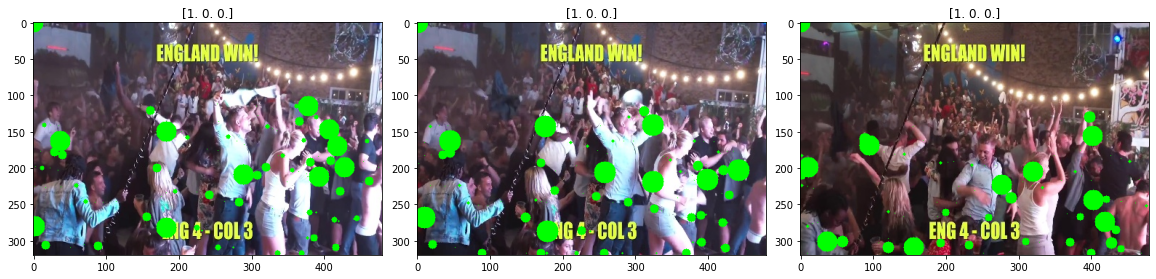

In [128]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
import cv2
import json

def render_saliency_map(model, root_folder, label, file_name):
    selected_files = []
    selected_images = []
    selected_labels = []
    files = next(os.walk(f"{root_folder}/{label}/"))[2]

    for file in files:
        if "_" + file_name in file:
            selected_files.append(file)
            categories = [0, 0, 0]
            categories[label - 1] = 1
            selected_labels.append(categories)

    for i, file in enumerate(sorted(selected_files)):
        if i >= 12:
            break
        # img = cv2.imread(f"{root_folder}/{label}/{file}")
        # img = cv2.imread(f"{root_folder}/{label}/{file}")
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # selected_images.append(img)
    # selected_images = np.array(selected_images)

    # X2 = np.expand_dims(X, axis=0)

    # Create Saliency object
    saliency = CustomSaliency(model, model_modifier, clone=False)

    # Generate saliency map
    saliency_map = saliency(X, label, smooth_samples=0)
    saliency_map = normalize(saliency_map)
    print(saliency_map.shape)

    IMG_WIDTH = 480
    IMG_HEIGHT = 320
    BATCH_SIZE = 36
    FRAMES = 12

    train_preview_generator = DataPreviewGenerator("val-final-frames", "val-final-pose", file_name, frames_to_use=12, batch_size=1, backprop=saliency_map)


    def show_batch(image_batch, label_batch):
        n_row = 1
        n_column = 3
        
        f, ax = plt.subplots(n_row, n_column)
        for i in range(n_column):
            ax[i].imshow(image_batch[0, i + 0])
            ax[i].title.set_text(label_batch[0])
        plt.subplots_adjust(wspace=0.1, hspace=0)
        f.set_size_inches(20, 10)
        plt.show()

    image_batch, label_batch = train_preview_generator.__getitem__(0)
    show_batch(image_batch, label_batch)


    # subprot_args = {
    #     'nrows': 3,
    #     'ncols': 12,
    #     'figsize': (36, 6),
    #     'subplot_kw': {'xticks': [], 'yticks': []}
    # }

    # f, ax = plt.subplots(**subprot_args)
    # for i in range(len(saliency_map)):
    #     ax[0, i].imshow(selected_images[i])
    #     ax[1, i].imshow(saliency_map[i], cmap='jet')
    #     ax[2, i].imshow(selected_images[i])
    #     ax[2, i].imshow(saliency_map[i], cmap='jet', alpha=0.5)
    # # plt.tight_layout()
    # plt.show()

pose_classifier = PoseClassifier("val-final-pose", model_location='https://storage.googleapis.com/cs231n-emotiw/models/pose-classifier-64lstm-0.01reg.h5', is_test=False)
render_saliency_map(pose_classifier.model, "val-final-pose", 1, "frame_86_54.mp4")


In [0]:
fprint(grads.shape)

Found 766 frames belonging to 766 videos belonging to 3 classes.
Min frames determined to be 15
frame_325_41
Video frame_325_41.mp4_5.jpg at index 0 with actions []
Video frame_325_41.mp4_13.jpg at index 0 with actions []
Video frame_325_41.mp4_12.jpg at index 0 with actions []
Video frame_325_41.mp4_8.jpg at index 0 with actions []
Video frame_325_41.mp4_1.jpg at index 0 with actions []
Video frame_325_41.mp4_7.jpg at index 0 with actions []
Video frame_325_41.mp4_6.jpg at index 0 with actions []
Video frame_325_41.mp4_14.jpg at index 0 with actions []
Video frame_325_41.mp4_9.jpg at index 0 with actions []
Video frame_325_41.mp4_4.jpg at index 0 with actions []
Video frame_325_41.mp4_10.jpg at index 0 with actions []
Video frame_325_41.mp4_0.jpg at index 0 with actions []


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


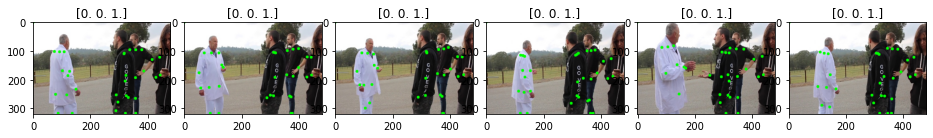

In [103]:

print(y_pred)
print(y_valid)
samples_to_display = []

for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_valid[i] == 1:
    # if y_valid[i] == 3:
        print(samples_run[i])
        samples_to_display.append(samples_run[i])


[1 3 2 3 3 1 1 3 3 3 3 3 3 3 3 1 1 3 3 3 2 3 3 3 3 1 3 3 3 2 3 3 3 1 1 3 2
 3 3 3 2 2 1 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3 3 2 3 3 2 1 3 3 3 3 3 3 3 1 3
 3 3 1 3 3 3 1 3 1 1 3 1 1 3 3 1 3 3 2 3 1 1 3 3 3 3 3 3 3 3 1 1 3 3 1 2 2
 1 3 3 2 3 1 3 3 3 3 3 3 3 3 3 3 3 2 3 3 1 3 3 3 3 2 3 3 2 2 3 3 1 3 3 2 3
 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 3 1 1 2 1 1 3 3 3 1 3 3 2 3 2
 2 3 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 3 2 2 3 1 1 2 1 2 3 2 3 2 2 2 2
 3 2 1 2 2 2 2 1 2 2 1 1 1 1 2 1 2 1 2 2 2 1 1 2 2 2 1 3 2 2 3 2 2 2 2 2 2
 2 2 2 2 3 2 2 3 1 2 3 2 2 2 2 2 3 2 1 1 2 2 2 1 2 2 1 1 1 1 2 2 1 2 2 2 2
 3 1 2 2 2 2 1 2 2 1 1 2 1 2 2 2 1 1 2 3 1 1 2 2 1 2 2 1 2 2 2 1 2 3 1 2 2
 1 2 2 3 3 1 1 2 1 1 1 3 3 2 2 2 1 2 2 3 2 2 2 2 3 2 2 1 2 2 3 3 1 2 2 2 3
 3 2 2 2 2 3 1 3 2 1 2 3 2 1 3 3 1 1 2 3 2 3 2 1 2 1 3 2 2 2 1 1 3 3 2 2 1
 2 3 1 2 2 2 1 2 2 1 3 2 2 2 1 2 1 3 2 2 3 3 1 3 2 3 2 1 3 1 1 2 2 1 2 1 1
 2 1 1 3 1 1 3 3 2 3 1 1 1 2 3 2 2 3 2 1 2 1 1 3 2 2 2 3 2 2 2 2 1 1 1 1 2
 2 2 1 3 2 3 1 2 1 2 3 2 

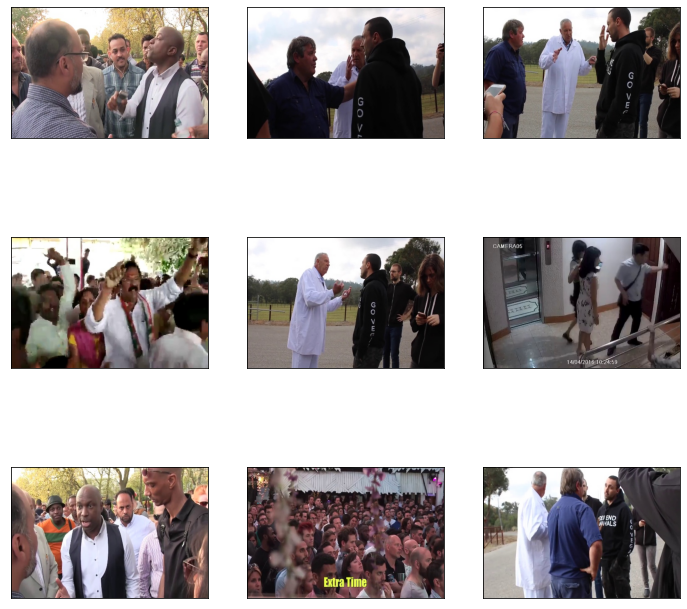

In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


subprot_args = {
    'nrows': 3,
    'ncols': 3,
    'figsize': (12, 12),
    'subplot_kw': {'xticks': [], 'yticks': []}
}

f, axarr = plt.subplots(**subprot_args)

r = 0
row = 0
while r < len(samples_to_display):
    for i in range(3):
        s = samples_to_display[r+60]
        img = cv2.imread(f"val-final-frames/3/frame_{s}.mp4_0.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axarr[row, i].imshow(img)
        r += 1
    row += 1
    if row == 3:
        break


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 0.4856396866840731


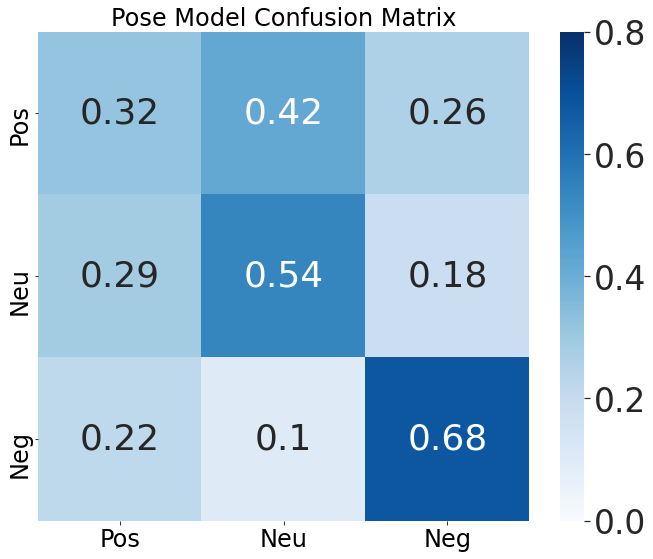

In [17]:
from sklearn import metrics 
import pandas as pd
import seaborn as sn
cm=metrics.confusion_matrix(y_valid,y_pred)
import matplotlib.pyplot as plt

classes=['Pos' , 'Neu' , 'Neg'] 
y_pred_final , y_true_final = np.array(y_pred) - 1 , np.array(y_valid) - 1
con_mat = tensorflow.math.confusion_matrix(labels=y_true_final, predictions=y_pred_final).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                  index = classes, 
                  columns = classes)

figure = plt.figure(figsize=(11, 9))
plt.tick_params(labelsize=24)
plt.title("Pose Model Confusion Matrix", fontsize=24)
sn.set(font_scale=3.0)
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues, vmin=0, vmax=0.8)


accuracy = (y_pred == y_valid).mean()
print(f"Accuracy: {accuracy}")


In [19]:
from sklearn.metrics import classification_report
target_names = ["Positive" , "Neutral" , "Negative"]
print(classification_report(y_valid, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Positive      0.445     0.321     0.373       302
     Neutral      0.507     0.536     0.521       280
    Negative      0.496     0.679     0.573       184

    accuracy                          0.486       766
   macro avg      0.483     0.512     0.489       766
weighted avg      0.480     0.486     0.475       766



In [0]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_pred, average="micro")


0.4856396866840731

## Frames Classifier

In [0]:
# Create the concatenated input layer to feed into FC

from src.classifiers.audio_classifier import AudioClassifier
from src.classifiers.frames_classifier import FramesClassifier
from src.classifiers.pose_classifier import PoseClassifier
from src.classifiers.face_classifier import FaceClassifier
from src.classifiers.utils import get_num_samples
import numpy as np

def run_frame_classifier(layers_to_extract, audio_folder='train-final-audio', frames_folder='train-final-frames', pose_folder='train-final-pose', face_folder='train-final-fer' , labels_file="Train_labels.txt", model_location='https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5'):
    frames_classifier = FramesClassifier(frames_folder, model_location, is_test=False)
    classifiers = [frames_classifier]

    sample_to_true_label = {}
    with open(labels_file) as f:
        l = 0
        for line in f:
            if l == 0:
                # Skip headers
                l += 1
                continue
            line_arr = line.split(" ")
            sample_to_true_label[line_arr[0].strip()] = int(line_arr[1].strip()) # subtract one to make labels from 0 to 2
            l += 1

    classifier_outputs = []
    classifier_samples = []
    classifier_dim_sizes = []
    output_dim_size = 0
    num_samples = 0
    sample_to_row = {}

    y_valid = []

    for i, classifier in enumerate(classifiers):
        output, samples = classifier.predict()
        # output, samples = classifier.predict(layers_to_extract[i])
        output_dim_size += output.shape[1]
        classifier_dim_sizes.append(output.shape[1])
        num_samples = len(samples)
        classifier_outputs.append(output)
        classifier_samples.append(samples)

    for sample in classifier_samples[0]:
        y_valid.append(sample_to_true_label[sample])

    return np.argmax(classifier_outputs[0], axis=1) + 1, y_valid, classifier_samples[0]





In [21]:
import tensorflow as tf

prefix = "final"
if IS_TINY:
    prefix = "tiny"

y_pred, y_valid, samples = run_frame_classifier([], audio_folder=f"val-{prefix}-audio", frames_folder=f"val-{prefix}-frames", pose_folder=f"val-{prefix}-pose", face_folder=f"val-{prefix}-fer" , labels_file="Val_labels.txt")

print(y_pred)
print(y_valid)

FramesClassifier created with frames_folder = val-final-frames , is_test = False , model_location = https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5
Skipping unzipping files as input is a folder
Found 766 frames belonging to 766 videos belonging to 3 classes.
Min frames determined to be 7
[2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 3 2 1 1 1 3 2 3 1 1 2 2
 1 2 3 2 2 2 1 1 2 2 3 2 3 2 2 2 2 2 1 1 2 2 2 1 1 2 3 3 2 2 3 2 2 2 2 3 2
 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 3 2 3 1 2 2 1 1 2 3 2 1 1 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 1 2 2 1 1 1 2 3 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 3 2
 3 2 2 2 1 1 3 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 1 3 2 3
 3 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2 2 3 1 2 2 1 3 2 1 2 2 1 3 1 2 1 1 2 1
 2 1 2 2 2 1 1 2 1 3 2 2 2 1 2 2 2 3 2 2 2 1 2 1 1 2 2 2 2 3 1 1 2 1 2 2 2
 2 1 2 3 1 1 3 2 2 2 1 2 2 1 2 2 1 1 1 2 2 1 1 1 1 1 1 3 1 2 1 3 3 1 2 1 1
 2 3 1 1 1 1 1 3 1 2 2 2 2 1 1 2 1 2 1 3 2 2 1 1 2 3 1 2 2 3 1 1 1 1 2 3

Accuracy: 0.5456919060052219
              precision    recall  f1-score   support

    Positive      0.581     0.520     0.549       302
     Neutral      0.518     0.611     0.561       280
    Negative      0.542     0.489     0.514       184

    accuracy                          0.546       766
   macro avg      0.547     0.540     0.541       766
weighted avg      0.549     0.546     0.545       766



0.5456919060052219

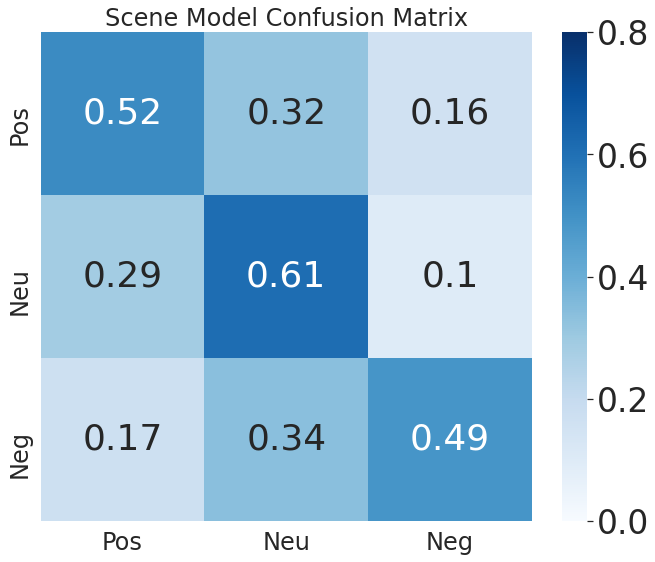

In [23]:
from sklearn import metrics 
import pandas as pd
import seaborn as sn
cm=metrics.confusion_matrix(y_valid,y_pred)
import matplotlib.pyplot as plt

classes=['Pos' , 'Neu' , 'Neg']
y_pred_final , y_true_final = np.array(y_pred) - 1 , np.array(y_valid) - 1
con_mat = tensorflow.math.confusion_matrix(labels=y_true_final, predictions=y_pred_final).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                  index = classes, 
                  columns = classes)

figure = plt.figure(figsize=(11, 9))
plt.tick_params(labelsize=24)
plt.title("Scene Model Confusion Matrix", fontsize=24)
sn.set(font_scale=3.0)
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues, vmin=0, vmax=0.8)


accuracy = (y_pred == y_valid).mean()
print(f"Accuracy: {accuracy}")


from sklearn.metrics import classification_report
target_names = ["Positive" , "Neutral" , "Negative"]
print(classification_report(y_valid, y_pred, target_names=target_names, digits=3))

from sklearn.metrics import f1_score
f1_score(y_valid, y_pred, average="micro")


In [0]:
!cp ../drive/'My Drive'/cs231n-project/datasets/emotiw/val-final-fer.zip .

In [0]:
!unzip val-final-fer.zip

Archive:  val-final-fer.zip
  inflating: faces-fer-Y.npy         
  inflating: faces-fer-X.npy         


In [0]:
!ls

 data					     train-final-frames.zip
 faces-fer-X.npy			     train-final-pose
 faces-fer-Y.npy			     train-final-pose.zip
 LICENSE				     Train_labels.txt
 models					     Train_labels.txt.1
 notebooks				     val-final-fer.zip
 README.md				     val-final-frames
 reports				     val-final-frames.zip
 requirements-predictions.txt		     val-final-pose
 requirements.txt			     val-final-pose.zip
'Screen Shot 2020-05-26 at 8.53.32 PM.png'   Val_labels.txt
 src					     Val_labels.txt.1
 train-final-frames


In [0]:
import numpy as np
X = np.load("faces-fer-X.npy")
Y = np.load("faces-fer-Y.npy")

In [0]:
Y[10]

array(['86_21', '2'], dtype='<U8')

In [0]:
X[10][0]

array([8.89914095e-01, 2.50010282e-01, 5.98906755e-01, 2.35497370e-01,
       2.26083413e-01, 1.25022903e-01, 1.61478132e-01, 2.41198111e-02,
       1.28565688e-07, 1.24185858e-02, 2.31354521e-03, 2.25494406e-03,
       7.09066671e-06, 1.57505705e-03, 4.22028024e-01, 4.44163261e-02,
       2.82489220e-01, 6.78837668e-02, 9.75294215e-02, 2.65535703e-02,
       5.90996644e-02, 6.00000000e+00])

In [0]:
!ls

 data					     train-final-frames.zip
 faces-fer-X.npy			     train-final-pose
 faces-fer-Y.npy			     train-final-pose.zip
 LICENSE				     Train_labels.txt
 models					     Train_labels.txt.1
 notebooks				     val-final-fer.zip
 README.md				     val-final-frames
 reports				     val-final-frames.zip
 requirements-predictions.txt		     val-final-pose
 requirements.txt			     val-final-pose.zip
'Screen Shot 2020-05-26 at 8.53.32 PM.png'   Val_labels.txt
 src					     Val_labels.txt.1
 train-final-frames


In [0]:
!ls -l

total 2875884
drwxr-xr-x 3 root root       4096 Jun  6 17:43  data
-rw-r--r-- 1 root root    1617920 Jun  4 19:01  faces-fer-X.npy
-rw-r--r-- 1 root root      49152 Jun  4 19:01  faces-fer-Y.npy
-rw-r--r-- 1 root root       1075 Jun  6 17:43  LICENSE
drwxr-xr-x 2 root root       4096 Jun  6 17:43  models
drwxr-xr-x 7 root root       4096 Jun  6 17:43  notebooks
-rw-r--r-- 1 root root        453 Jun  6 17:43  README.md
drwxr-xr-x 3 root root       4096 Jun  6 17:43  reports
-rw-r--r-- 1 root root        178 Jun  6 17:43  requirements-predictions.txt
-rw-r--r-- 1 root root        183 Jun  6 17:43  requirements.txt
-rw-r--r-- 1 root root     972010 Jun  6 17:43 'Screen Shot 2020-05-26 at 8.53.32 PM.png'
drwxr-xr-x 6 root root       4096 Jun  6 17:45  src
drwxr-xr-x 5 root root       4096 May 31 01:35  train-final-frames
-rw------- 1 root root 2244673701 Jun  6 17:40  train-final-frames.zip
drwxr-xr-x 5 root root       4096 May 31 02:30  train-final-pose
-rw------- 1 root root   50984177 J

### Saliency Map

In [16]:
!pip install tf-keras-vis

In [0]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tf_keras_vis import ModelVisualization
from tf_keras_vis.utils import check_steps, listify

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# Adapted from https://github.com/keisen/tf-keras-vis/blob/master/tf_keras_vis/saliency.py
class CustomSaliency(ModelVisualization):
    def __call__(self,
                 seed_input,
                 label,
                 smooth_samples=0,
                 smooth_noise=0.20,
                 keepdims=False,
                 gradient_modifier=lambda grads: K.abs(grads)):
        """Generate an attention map that appears how output value changes with respect to a small
            change in input image pixels.
            See details: https://arxiv.org/pdf/1706.03825.pdf
        # Arguments
            seed_input: An N-dim Numpy array. If the model has multiple inputs,
                you have to pass a list of N-dim Numpy arrays.
            smooth_samples: The number of calculating gradients iterations. If set to zero,
                the noise for smoothing won't be generated.
            keepdims: A boolean that whether to keep the channels-dim or not.
            smooth_noise: Noise level that is recommended no tweaking when there is no reason.
            gradient_modifier: A function to modify gradients. By default, the function modify
                gradients to `absolute` values.
        # Returns
            The heatmap image indicating the `seed_input` regions whose change would most contribute
            towards maximizing the loss value, Or a list of their images.
            A list of Numpy arrays that the model inputs that maximize the out of `loss`.
        # Raises
            ValueError: In case of invalid arguments for `loss`, or `seed_input`.
        """
        # Preparing
        seed_inputs = tf.convert_to_tensor(seed_input, dtype=tf.float32)
        # Processing saliency
        if smooth_samples > 0:
            axis = tuple(range(1, len(seed_inputs.shape)))
            sigmas = smooth_noise * (np.max(seed_inputs, axis=axis) - np.min(seed_inputs, axis=axis))
            total_gradients = np.zeros_like(seed_inputs)
            for i in range(check_steps(smooth_samples)):
                print(f"Running step {i}")
                seed_inputs_plus_noise = tf.constant(
                        np.concatenate([
                            x + np.random.normal(0., s, (1, ) + x.shape) for x, s in zip(seed_inputs, sigmas)
                        ])
                )

                gradients = self._get_gradients(seed_inputs_plus_noise, gradient_modifier, label)
                total_gradients = total_gradients + gradients[0]
            grads = total_gradients / smooth_samples
        else:
            grads = self._get_gradients(seed_inputs, gradient_modifier, label)

        # Visualizing
        if not keepdims:
            grads = [np.max(g, axis=-1) for g in grads]
        if len(self.model.inputs) == 1 and not isinstance(seed_input, list):
            grads = grads[0]
        return grads

    # Define loss function. 
    def loss(self, output, label):
        # 0 is positive, 1 is neutral, 2 is negative
        return (output[0, label - 1])

    def _get_gradients(self, seed_inputs, gradient_modifier, label):
        with tf.GradientTape() as tape:
            tape.watch(seed_inputs)
            outputs = self.model(seed_inputs)
            loss_values = self.loss(outputs, label)
            grads = tape.gradient(loss_values, seed_inputs)
        if gradient_modifier is not None:
            grads = [gradient_modifier(g) for g in grads]
        return grads

In [0]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
import cv2

def render_saliency_map(model, root_folder, label, file_name):
    selected_files = []
    selected_images = []
    selected_labels = []
    files = next(os.walk(f"{root_folder}/{label}/"))[2]

    for file in files:
        if "_" + file_name in file:
            selected_files.append(file)
            categories = [0, 0, 0]
            categories[label - 1] = 1
            selected_labels.append(categories)

    for i, file in enumerate(sorted(selected_files)):
        if i >= 12:
            break

        img = cv2.imread(f"{root_folder}/{label}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        selected_images.append(img)
    selected_images = np.array(selected_images)

    X = np.expand_dims(selected_images, axis=0)

    # Create Saliency object
    saliency = CustomSaliency(model, model_modifier, clone=False)

    # Generate saliency map
    saliency_map = saliency(X, label, smooth_samples=10)
    saliency_map = normalize(saliency_map)

    subprot_args = {
        'nrows': 3,
        'ncols': 12,
        'figsize': (36, 6),
        'subplot_kw': {'xticks': [], 'yticks': []}
    }

    f, ax = plt.subplots(**subprot_args)
    for i in range(len(saliency_map)):
        ax[0, i].imshow(selected_images[i])
        ax[1, i].imshow(saliency_map[i], cmap='jet')
        ax[2, i].imshow(selected_images[i])
        ax[2, i].imshow(saliency_map[i], cmap='jet', alpha=0.5)
    # plt.tight_layout()
    plt.show()


    # subprot_args = {
    #     'nrows': 1,
    #     'ncols': 12,
    #     'figsize': (24, ),
    #     'subplot_kw': {'xticks': [], 'yticks': []}
    # }
    # f, ax = plt.subplots(**subprot_args)
    # for i in range(len(saliency_map)):
    #     ax[i].imshow(selected_images[i])
    #     ax[i].imshow(saliency_map[i], cmap='jet', alpha=0.5)
    # plt.tight_layout()
    # plt.show()


In [0]:
!ls val-final-frames

1  2  3


In [0]:
# y_pred_final
# y_true_final
# samples

print("Predicted Negative, Actually Positive")
for i in range(len(y_valid)):
    if y_valid[i] == 1 and y_pred[i] == 3:
        print(samples[i])
        break

Predicted Negative, Actually Positive
289_2


#### Best 3 head model

FramesClassifier created with frames_folder = val-final-frames , is_test = False , model_location = https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5
Running step 0
Running step 1
Running step 2
Running step 3
Running step 4
Running step 5
Running step 6
Running step 7
Running step 8
Running step 9


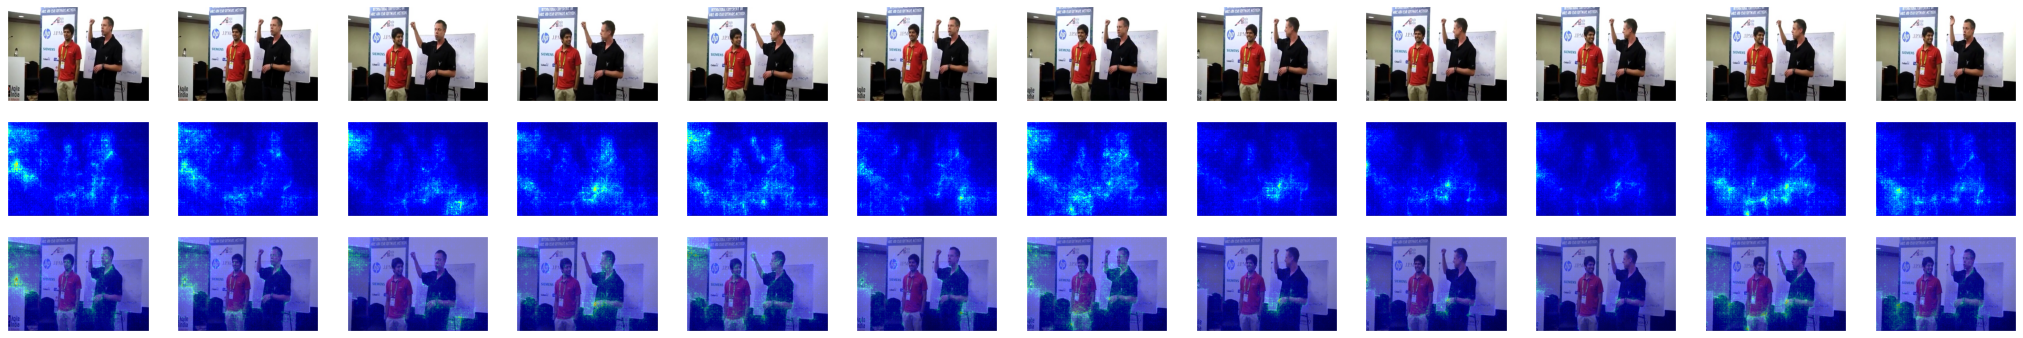

In [0]:
frames_classifier = FramesClassifier("val-final-frames", model_location='https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5', is_test=False)
render_saliency_map(frames_classifier.model, "val-final-frames", 1, "289_2.mp4")


Predicted Pos, Actually Pos
['289_44', '44_25', '44_2', '86_54', '289_63', '86_42', '179_5', '45_8', '86_58', '289_29', '212_13', '332_3', '86_2', '45_2', '5_6', '222_16', '27_11', '5_16', '289_32', '44_6', '54_11', '165_3', '44_22', '5_9', '289_62', '212_2', '54_7', '54_3', '239_1', '289_36', '44_29', '5_3', '289_65', '289_34', '70_3', '289_30', '86_55', '86_26', '45_10', '145_2', '27_19', '143_5', '289_58', '289_43', '5_11', '31_7', '44_18', '222_7', '222_11', '125_10', '44_1', '289_61', '181_5', '5_8', '44_17', '145_3', '5_10', '212_11', '289_51', '5_13', '131_3', '5_5', '5_14', '27_18', '212_12', '289_59', '222_17', '54_9', '5_1', '86_4', '86_56', '31_2', '44_23', '239_2', '45_9', '305_1', '179_4', '289_53', '212_4', '86_50', '31_5', '335_9', '289_35', '143_1', '86_31', '222_15', '252_1', '45_5', '305_2', '239_5', '145_1', '45_4', '5_15', '86_47', '289_50', '44_13', '212_7', '44_26', '289_45', '86_43', '179_2', '212_9', '86_3', '86_41', '289_18', '289_60', '27_4', '44_20', '239_8',

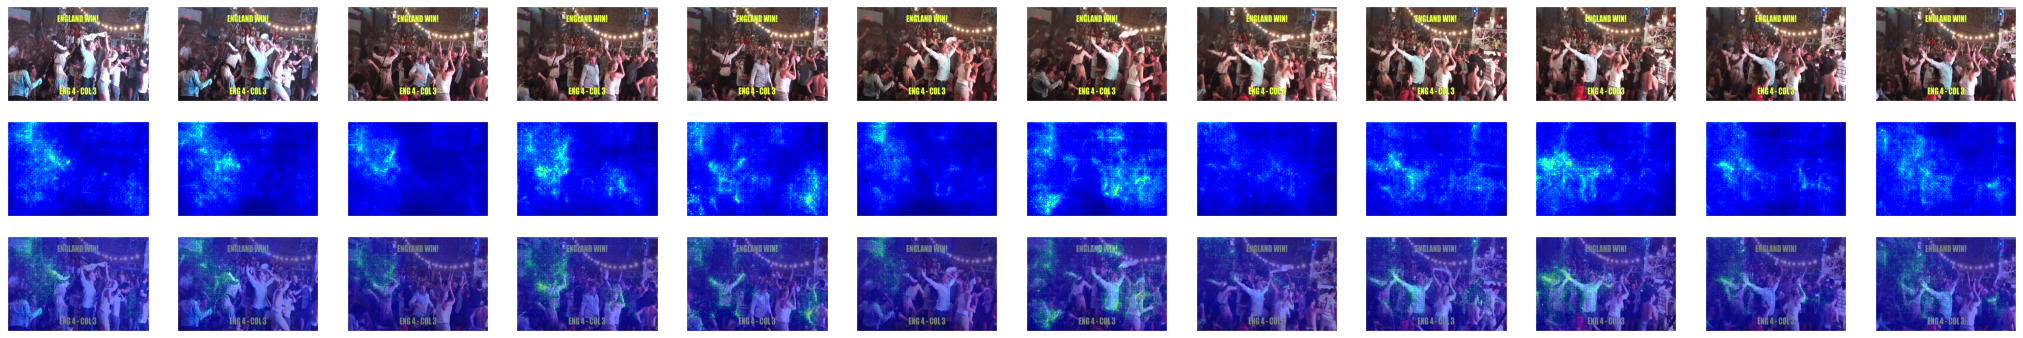

FramesClassifier created with frames_folder = val-final-frames , is_test = False , model_location = https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5
Running step 0
Running step 1
Running step 2


ResourceExhaustedError: ignored

In [0]:
samples_to_render = []
print("Predicted Pos, Actually Pos")
for i in range(len(y_valid)):
    if y_valid[i] == 1 and y_pred[i] == 1:
        samples_to_render.append(samples[i])

print(samples_to_render)
for i in range(3):
    frames_classifier = FramesClassifier("val-final-frames", model_location='https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5', is_test=False)
    render_saliency_map(frames_classifier.model, "val-final-frames", 1, samples_to_render[i+3] + ".mp4")


In [0]:
samples_to_render = []
print("Predicted Pos, Actually Neg")
for i in range(len(y_valid)):
    if y_valid[i] == 3 and y_pred[i] == 1:
        samples_to_render.append(samples[i])

print(samples_to_render)
for i in range(3):
    frames_classifier = FramesClassifier("val-final-frames", model_location='https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5', is_test=False)
    render_saliency_map(frames_classifier.model, "val-final-frames", 3, samples_to_render[i+3] + ".mp4")


Output hidden; open in https://colab.research.google.com to view.

In [0]:
samples_to_render = []
print("Predicted Pos, Actually Neutral")
for i in range(len(y_valid)):
    if y_valid[i] == 2 and y_pred[i] == 1:
        samples_to_render.append(samples[i])

print(samples_to_render)
for i in range(3):
    frames_classifier = FramesClassifier("val-final-frames", model_location='https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5', is_test=False)
    render_saliency_map(frames_classifier.model, "val-final-frames", 2, samples_to_render[i] + ".mp4")


Output hidden; open in https://colab.research.google.com to view.

#### 3 vs 1 head model

In [0]:
prefix = "final"
y_pred_1_head, y_valid_1_head, samples_1_head = run_frame_classifier([], audio_folder=f"val-{prefix}-audio", frames_folder=f"val-{prefix}-frames", pose_folder=f"val-{prefix}-pose", face_folder=f"val-{prefix}-fer" , labels_file="Val_labels.txt", model_location='../drive/My Drive/checkpoints/resnet-lstm-v5/convlstmfilters-70-reg-0.001-cp-0002.h5')
print(samples_1_head)


FramesClassifier created with frames_folder = val-final-frames , is_test = False , model_location = ../drive/My Drive/checkpoints/resnet-lstm-v5/convlstmfilters-70-reg-0.001-cp-0002.h5
Skipping unzipping files as input is a folder
Found 766 frames belonging to 766 videos belonging to 3 classes.
Min frames determined to be 7
['298_32', '159_6', '298_6', '284_8', '251_2', '298_18', '298_44', '298_27', '284_12', '294_19', '157_14', '99_6', '53_39', '294_48', '294_34', '335_3', '298_57', '54_1', '298_14', '53_30', '308_3', '298_34', '70_22', '55_2', '53_33', '314_4', '325_32', '81_7', '289_68', '81_18', '320_11', '15_3', '81_21', '237_2', '81_23', '55_11', '15_6', '237_3', '159_4', '314_3', '53_31', '53_14', '55_9', '294_17', '294_32', '298_25', '298_42', '152_1', '284_10', '81_25', '53_35', '298_54', '55_17', '298_37', '325_57', '294_24', '294_11', '325_31', '294_35', '54_10', '54_4', '274_6', '298_8', '325_3', '222_18', '294_3', '294_9', '274_7', '237_1', '53_34', '70_20', '294_10', '83_

In [0]:
print(samples[0:10])
print(samples_1_head[0:10])

['298_32', '159_6', '298_6', '284_8', '251_2', '298_18', '298_44', '298_27', '284_12', '294_19']
['298_32', '159_6', '298_6', '284_8', '251_2', '298_18', '298_44', '298_27', '284_12', '294_19']


In [0]:
samples_to_render = []
print("3 head predicted correct but 1 head did not")
for i in range(len(y_valid)):
    if y_valid[i] == y_pred[i] and y_valid_1_head[i] != y_pred_1_head[i]:
        samples_to_render.append((samples[i], y_valid[i], y_pred_1_head[i]))
print(samples_to_render)


3 head predicted correct but 1 head did not
[('15_3', 2, 1), ('55_11', 2, 1), ('15_6', 2, 1), ('159_4', 2, 1), ('53_31', 2, 1), ('55_9', 2, 1), ('284_10', 2, 1), ('55_17', 2, 1), ('54_10', 2, 1), ('70_20', 2, 1), ('294_37', 2, 1), ('294_4', 2, 1), ('159_2', 2, 1), ('70_19', 2, 1), ('294_23', 2, 1), ('70_23', 2, 1), ('54_14', 2, 1), ('294_22', 2, 1), ('55_16', 2, 1), ('284_1', 2, 1), ('294_16', 2, 1), ('70_25', 2, 1), ('70_21', 2, 1), ('53_38', 2, 1), ('70_30', 2, 1), ('55_3', 2, 1), ('55_5', 2, 1), ('159_5', 2, 1), ('159_3', 2, 1), ('131_5', 2, 1), ('55_8', 2, 1), ('15_4', 2, 1), ('190_6', 2, 3), ('55_19', 2, 1), ('55_13', 2, 1), ('55_20', 2, 1), ('104_3', 2, 1), ('294_33', 2, 1), ('104_2', 2, 1), ('159_7', 2, 1), ('237_6', 2, 1), ('251_5', 2, 1), ('55_10', 2, 1), ('81_1', 2, 1), ('294_25', 2, 1), ('55_15', 2, 1), ('289_63', 1, 3), ('289_34', 1, 3), ('86_56', 1, 3), ('86_41', 1, 3), ('320_2', 3, 2), ('325_8', 3, 2), ('306_14', 3, 2), ('320_5', 3, 2), ('320_10', 3, 1), ('306_6', 3, 2), 

In [0]:
for i in range(3):
    frames_classifier = FramesClassifier("val-final-frames", model_location='https://storage.googleapis.com/cs231n-emotiw/models/scene-classifier-resnet-lstm-x3.h5', is_test=False)
    render_saliency_map(frames_classifier.model, "val-final-frames", samples_to_render[i][1], samples_to_render[i][0] + ".mp4")
    frames_classifier = FramesClassifier("val-final-frames", model_location='../drive/My Drive/checkpoints/resnet-lstm-v5/convlstmfilters-70-reg-0.001-cp-0002.h5', is_test=False)
    render_saliency_map(frames_classifier.model, "val-final-frames", samples_to_render[i][1], samples_to_render[i][0] + ".mp4")


Output hidden; open in https://colab.research.google.com to view.

Accuracy: 0.5352480417754569
              precision    recall  f1-score   support

    Positive       0.54      0.63      0.58       302
     Neutral       0.50      0.46      0.48       280
    Negative       0.57      0.48      0.52       184

    accuracy                           0.54       766
   macro avg       0.54      0.53      0.53       766
weighted avg       0.54      0.54      0.53       766



0.5352480417754569

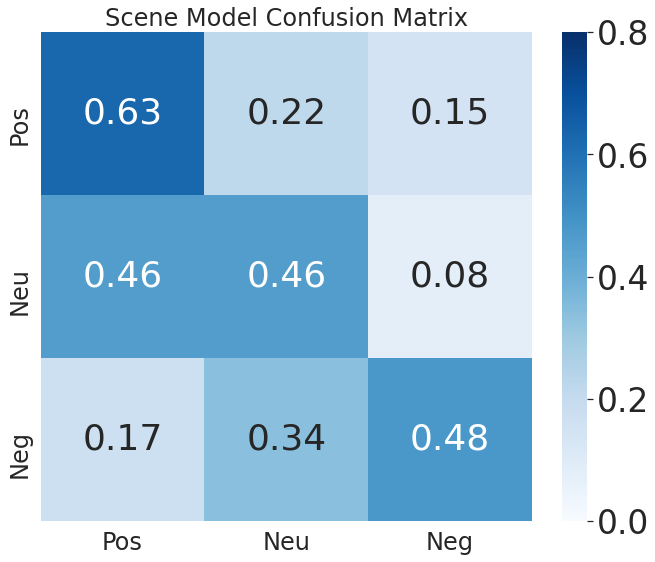

In [0]:
###
#
# Confusion matrix 1 head model
# 
from sklearn import metrics 
import pandas as pd
import seaborn as sn
cm=metrics.confusion_matrix(y_valid_1_head,y_pred_1_head)
import matplotlib.pyplot as plt

classes=['Pos' , 'Neu' , 'Neg']
y_pred_final , y_true_final = np.array(y_pred_1_head) - 1 , np.array(y_valid_1_head) - 1
con_mat = tensorflow.math.confusion_matrix(labels=y_true_final, predictions=y_pred_final).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                  index = classes, 
                  columns = classes)

figure = plt.figure(figsize=(11, 9))
plt.tick_params(labelsize=24)
plt.title("Scene Model Confusion Matrix", fontsize=24)
sn.set(font_scale=3.0)
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues, vmin=0, vmax=0.8)


accuracy = (y_pred_1_head == y_valid_1_head).mean()
print(f"Accuracy: {accuracy}")


from sklearn.metrics import classification_report
target_names = ["Positive" , "Neutral" , "Negative"]
print(classification_report(y_valid_1_head, y_pred_1_head, target_names=target_names))

from sklearn.metrics import f1_score
f1_score(y_valid_1_head, y_pred_1_head, average="micro")


## Inception Model

FramesClassifier created with frames_folder = val-final-frames , is_test = False , model_location = ../drive/My Drive/checkpoints/inception-lstm-v4/cp-0002.h5
Running step 0
Running step 1
Running step 2
Running step 3
Running step 4
Running step 5
Running step 6
Running step 7
Running step 8
Running step 9


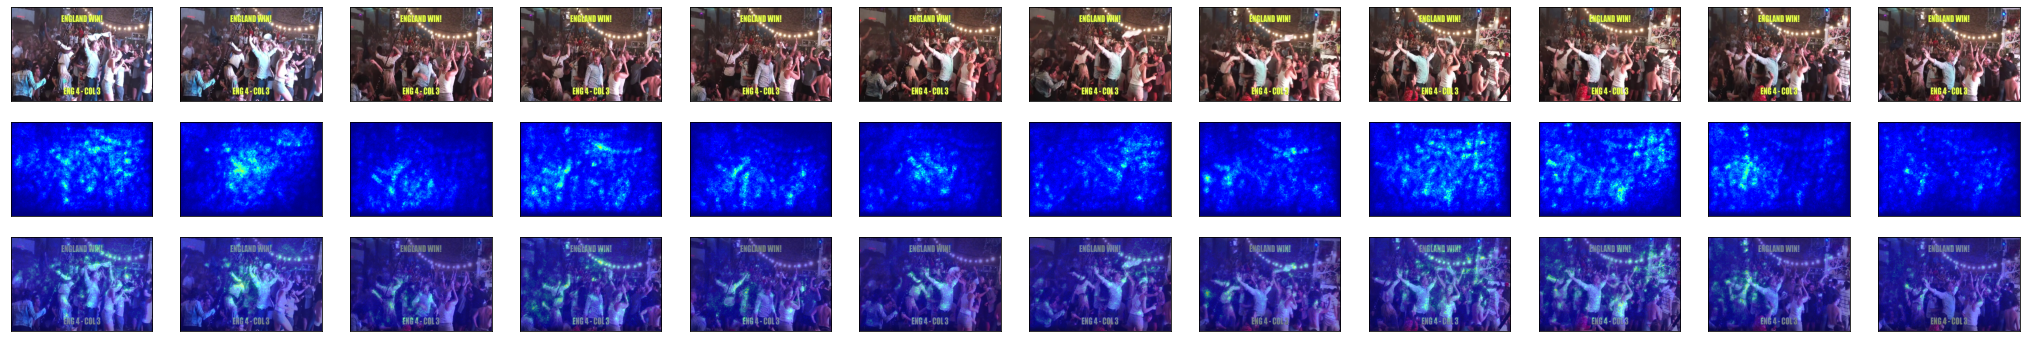

In [0]:

from src.classifiers.frames_classifier import FramesClassifier
from sklearn import metrics 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

frames_classifier = FramesClassifier("val-final-frames", model_location='../drive/My Drive/checkpoints/inception-lstm-v4/cp-0002.h5', is_test=False)
render_saliency_map(frames_classifier.model, "val-final-frames", 1, "86_54.mp4")



In [0]:
!!ls ../drive/My\ Drive/checkpoints-old-order/inception-lstm/cp-0009.h5

'../drive/My Drive/checkpoints-old-order/inception-lstm/cp-0009.h5'


In [0]:
!ls

 data					     train-final-frames.zip
 faces-fer-X.npy			     train-final-pose
 faces-fer-Y.npy			     train-final-pose.zip
 LICENSE				     Train_labels.txt
 models					     Train_labels.txt.1
 notebooks				     val-final-fer.zip
 README.md				     val-final-frames
 reports				     val-final-frames.zip
 requirements-predictions.txt		     val-final-pose
 requirements.txt			     val-final-pose.zip
'Screen Shot 2020-05-26 at 8.53.32 PM.png'   Val_labels.txt
 src					     Val_labels.txt.1
 train-final-frames
